In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

# Importing Dataset

In [2]:
data=pd.read_csv('creditcard.csv')

# Check Dataset Any Value Null or Not

In [3]:
data.isnull().values.any()

False

# Print Data Information

In [4]:
data.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [5]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.23709

# Check the transaction distribution

In [6]:
Total_transactions = len(data)
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
fraud_percentage = (len(fraud)/float(len(valid))*100)
print(('TotalTrnsactions: {}'.format(Total_transactions)))
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))
print('Percentage of fraud Transactions: {}'.format(fraud_percentage))

TotalTrnsactions: 284807
Fraud Cases: 492
Valid Transactions: 284315
Percentage of fraud Transactions: 0.17304750013189596


# Print Fraud Transaction Details

In [7]:
print("details of the fraud transaction")

fraud.Amount.describe()

details of the fraud transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# Print Normal Transaction Details

In [8]:
print("details of the fraud transaction")

valid.Amount.describe()

details of the fraud transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

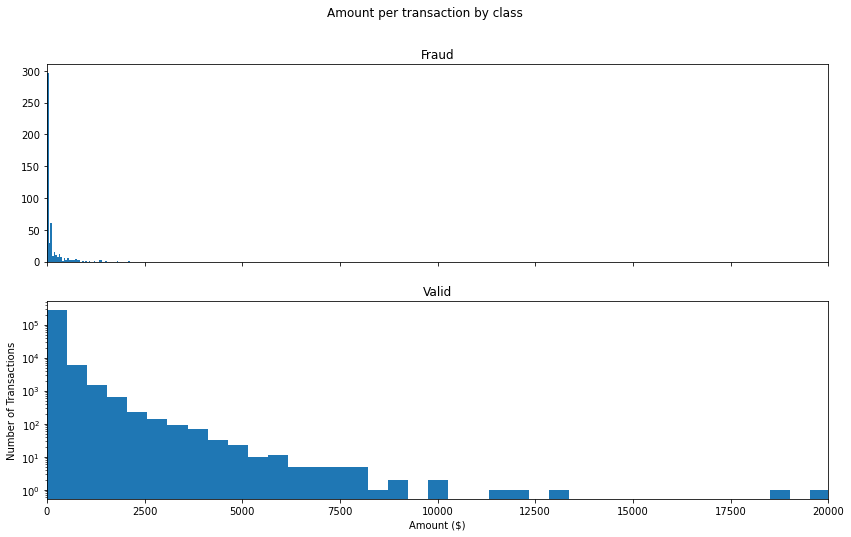

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(valid.Amount, bins = bins)
ax2.set_title('Valid')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

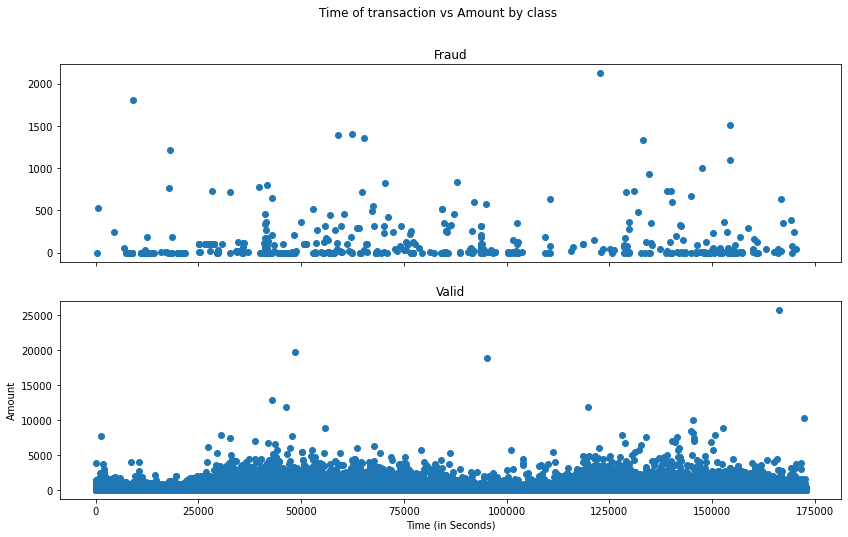

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(valid.Time, valid.Amount)
ax2.set_title('Valid')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

<AxesSubplot:>

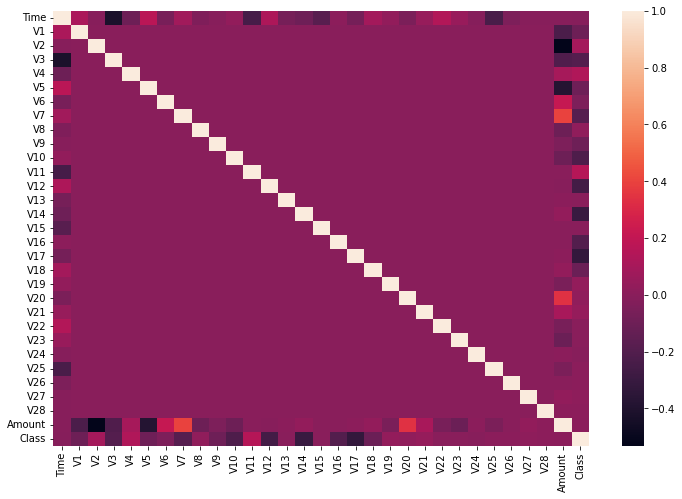

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr())

# Training the Modal

In [22]:
xTrain, xTest, yTrain, yTest = train_test_split(xdata, ydata, test_size = 0.25, random_state = 1)

In [12]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
xdata = X.values
ydata = Y.values
outlier_fraction = len(fraud)/float(len(valid))

(284807, 30)
(284807,)


In [42]:
b = IsolationForest(max_samples = len(X),contamination = outlier_fraction)
b.fit(X)
y_prediction2 = b.predict(X)
y_prediction2[y_prediction2 == 1] = 0
y_prediction2[y_prediction2 == -1] = 1

In [43]:
print("The model used is Isolation Forest")
errors2 = (y_prediction2 != Y).sum()
print(" Error: {}".format(errors2))
print("Accuracy: {}".format(accuracy_score(y_prediction2,Y)))
print(classification_report(y_prediction2,Y))

The model used is Isolation Forest
 Error: 703
Accuracy: 0.9975316617920206
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284314
           1       0.29      0.29      0.29       493

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807



In [23]:
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

In [34]:
print("The model used is Random Forest classifier")
errors2 = (yTest != yPred).sum()
print(" Error: {}".format(errors2))
acc = accuracy_score(yTest, yPred)
print("Accuracy: {}".format(acc))
print(classification_report(yTest, yPred))

The model used is Random Forest classifier
 Error: 32
Accuracy: 0.9995505744220669
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.93      0.77      0.84       111

    accuracy                           1.00     71202
   macro avg       0.97      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202



In [35]:
DT = DecisionTreeClassifier()
DT.fit(xTrain, yTrain)
# prediction
dt_yhat = DT.predict(xTest)

In [37]:
print("The model used is Decision Tree Classifier")
errors2 = (yTest != dt_yhat).sum()
print(" Error: {}".format(errors2))
acc = accuracy_score(yTest, dt_yhat)
print("Accuracy: {}".format(acc))
print(classification_report(yTest, dt_yhat))

The model used is Decision Tree Classifier
 Error: 64
Accuracy: 0.9991011488441336
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.71      0.71      0.71       111

    accuracy                           1.00     71202
   macro avg       0.86      0.86      0.86     71202
weighted avg       1.00      1.00      1.00     71202



In [38]:
#  K-Nearest Neighbors model creation
KNN = KNeighborsClassifier()
KNN.fit(xTrain, yTrain)
knn_yhat = KNN.predict(xTest)

In [39]:
print("The model used is K Neighbors Classifier")
errors2 = (yTest != knn_yhat).sum()
print(" Error: {}".format(errors2))
acc = accuracy_score(yTest, knn_yhat)
print("Accuracy: {}".format(acc))
print(classification_report(yTest, knn_yhat))

The model used is K Neighbors Classifier
 Error: 109
Accuracy: 0.9984691441251651
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       1.00      0.02      0.04       111

    accuracy                           1.00     71202
   macro avg       1.00      0.51      0.52     71202
weighted avg       1.00      1.00      1.00     71202



In [40]:
#LogisticRegression model creation
LR=LogisticRegression(max_iter=1000)
LR.fit(xTrain,yTrain)
y_LR =LR.predict(xTest)

In [41]:
print("The model used is Logistic Regression")
errors2 = (yTest != y_LR).sum()
print(" Error: {}".format(errors2))
acc = accuracy_score(yTest, y_LR)
print("Accuracy: {}".format(acc))
print(classification_report(yTest, y_LR))

The model used is Logistic Regression
 Error: 69
Accuracy: 0.9990309260975815
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.72      0.62      0.67       111

    accuracy                           1.00     71202
   macro avg       0.86      0.81      0.83     71202
weighted avg       1.00      1.00      1.00     71202

